In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv 
from citipy import citipy
import datetime
import gmaps
import seaborn as sb

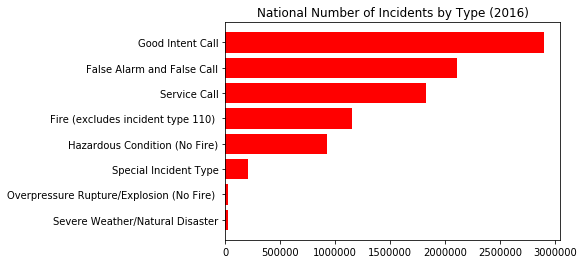

In [2]:
# open national stats csv
ns1 = "nationalstats1.csv"
ns1r = pd.read_csv(ns1)
ns1r_df= ns1r.sort_values(by=["Calls", "Total Percentage"], ascending = [False,True])
#ns1r

#graph
ns1rlabels = ns1r_df["Description "]
fig, ax = plt.subplots()
y_pos = np.arange(len(ns1rlabels))
ax.barh(y_pos, ns1r_df["Calls"], align='center',
        color='red', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(ns1rlabels)
ax.invert_yaxis() #supposed to sort from highest to lowest
ax.set_title('National Number of Incidents by Type (2016)')
# plt.show()

# Save Figure
plt.savefig("graphics/National Number of Incidents by Type.png", bbox_inches="tight", dpi=100)
plt.show()

In [3]:
# open main fire data csv
firefile = './output/all_with_no_incident_nulls.csv'
fire = pd.read_csv(firefile, skip_blank_lines=True, encoding='UTF-8')
print(len(fire))
#fire
#fire.dtypes

#groupby 
fireyears = fire.groupby(["Year"])
fireyears_df = pd.DataFrame(fireyears.count())
fireyears_df

fire2016 = fire.query("Year =='2016'")
print(len(fire2016))
fire2016

C:\Users\DAbootcamp1\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


159803
15746


,OBJECTID,address,address2,apt_room,arrive_date_time,cleared_date_time,dispatch_date_time,exposure,incident_number,incident_type,incident_type_description,platoon,station,Longitude,Latitude,Year,Date
106904,598879,"1940 ENTREPRENEUR DR RALEIGH, NC 27601",NCSU PLAZA HALL,2,2/19/2016 1:54,2/19/2016 2:26,2/19/2016 1:48,0,16-0005340,500,Service Call other,A,20.0,-78.67330174,35.76943744,2016,2/19/2016
108244,600248,"I 440 EB & I 495 NB RALEIGH, NC 27601",,,4/20/2016 19:23,4/20/2016 19:34,4/20/2016 19:18,0,16-0012194,143,Grass fire,C,11.0,missing,missing,2016,4/20/2016
108382,600389,"4716 NEW BERN AVE RALEIGH, NC 27601",QUALITY INN RALEIGH,,1/1/2016 4:43,1/1/2016 5:00,1/1/2016 4:39,0,15-0040229,531,Smoke or odor removal,B,21.0,-78.556639,35.797757,2016,1/1/2016
108447,600455,"920 PALACE GARDEN WAY RALEIGH, NC 27601",,,NaN,1/1/2016 3:14,1/1/2016 3:12,0,15-0040218,611,Dispatched & cancelled en route,B,2.0,-78.659274,35.739471,2016,1/1/2016
108457,600465,"8311 NIAYAH WAY RALEIGH, NC 27601",,,1/1/2016 0:38,1/1/2016 0:51,1/1/2016 0:31,0,15-0040205,531,Smoke or odor removal,B,17.0,-78.734603,35.876067,2016,1/1/2016
108902,600925,"2512 TRYON GROVE DR RALEIGH, NC 27603",,103,1/1/2016 3:49,1/1/2016 3:52,1/1/2016 3:41,0,15-0040223,510,Person in distress Other,B,2.0,-78.689643,35.744553,2016,1/1/2016
109138,601167,"841 HANDSWORTH LN RALEIGH, NC 27601",,,1/1/2016 3:46,1/1/2016 3:51,1/1/2016 3:39,0,15-0040222,740,Unintentional transmission of alarm Other,B,8.0,-78.738261,35.795173,2016,1/1/2016
109196,601225,"540 HERTFORD ST RALEIGH, NC 27608",,,1/1/2016 4:44,1/1/2016 4:52,1/1/2016 4:36,0,15-0040228,700,False alarm or false call Other,B,6.0,-78.655017,35.827887,2016,1/1/2016
109264,601294,"611 FRANK ST RALEIGH, NC 27601",,,1/1/2016 1:42,1/1/2016 1:44,1/1/2016 1:37,0,15-0040208,611,Dispatched & cancelled en route,B,7.0,-78.625357,35.796175,2016,1/1/2016
109311,601342,"WAKE FOREST RD & I 440 EB RALEIGH, NC 27601",,,1/1/2016 8:17,1/1/2016 8:31,1/1/2016 8:11,0,16-0000022,411,Gasoline or other flammable liquid spill,B,11.0,-78.62140408,35.82530305,2016,1/1/2016


C:\Users\DAbootcamp1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\DAbootcamp1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.0, 'Raleigh FD Number of Incidents by Type (2016)')

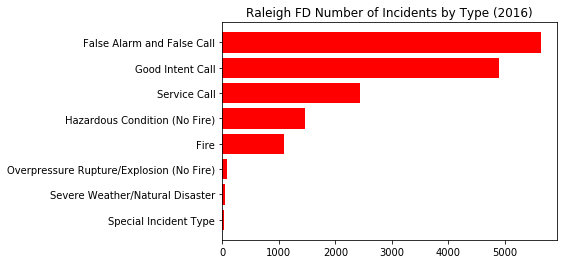

In [8]:
# incident bins
bins = [100, 199, 299, 499, 599, 699, 799, 899, 9999]
labels = ["Fire", "Overpressure Rupture/Explosion (No Fire)", "Hazardous Condition (No Fire)", "Service Call", "Good Intent Call", "False Alarm and False Call",
         "Severe Weather/Natural Disaster", "Special Incident Type"]
fire2016["Types of Calls"] = pd.cut(fire2016["incident_type"], bins, labels=labels)
fire2016["Types of Calls2"] = fire2016["Types of Calls"]
#fire2016
fire2016bin = fire2016.groupby(["Types of Calls"])
bincounts = fire2016bin["Types of Calls"].count()
pofcalls = bincounts/len(fire2016)
fire2016typesofcalls = pd.DataFrame({"Total Count": bincounts,
                                     "Percentage": pofcalls})
fire2016typesofcalls["Percentage"] = fire2016typesofcalls["Percentage"].map("{0:.0%}".format)
sorted_df= fire2016typesofcalls.sort_values(by=["Total Count", "Percentage"], ascending = [False,True])
sorted_df

#h-barchart
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))
ax.barh(y_pos, sorted_df["Total Count"], align='center',
        color='red', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(["False Alarm and False Call","Good Intent Call", "Service Call", "Hazardous Condition (No Fire)", "Fire", "Overpressure Rupture/Explosion (No Fire)", 
         "Severe Weather/Natural Disaster", "Special Incident Type"])
ax.invert_yaxis() #supposed to sort from highest to lowest
ax.set_title('Raleigh FD Number of Incidents by Type (2016)')
# plt.show()

# # Save Figure
# plt.savefig("graphics/Raleigh FD Number of Incidents by Type.png", bbox_inches="tight", dpi=100)
# plt.show()